# WeatherPy

---


In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import requests
import time
from scipy.stats import linregress

from api_keys import weather_api
from citipy import citipy


### Generate list of Cities using "citipy" library

In [2]:
# Empty lists for latitude/longitude and city names
lats_lons = []
cities = []

# Setting range of latitude and longitude
lat_range = (-90, 90)
lon_range = (-180, 180)

# Random set of latitude and longitude combinations
lat_random = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lon_random = np.random.uniform(lon_range[0], lon_range[1], size=1500)
lats_lons = zip(lat_random, lon_random)

# Determine nearest city for each latitude and longitude combination
for lat_lon in lats_lons:
    city = citipy.nearest_city(lat_lon[0], lat_lon[1]).city_name

    # However, if city name is unique add it to cities list
    if city not in cities:
        cities.append(city)

print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 577


---

## Requirement 1: 
## Create Plots to showcase the relationship between "Weather Variables" and "Latitude"

### Used OpenWeatherMap API to retrieve weather data from cities list generated in above code

In [3]:
# Base API Url
base_url = f"http://api.openweathermap.org/data/2.5/weather?&units=metric&appid={weather_api}&q="

# Empty list to hold weather data for each city
city_data = []

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Counters
record_count = 1
set_count = 1

# Loop through cities in list to gather weather data
for i, city in enumerate(cities):

    # Group cities in set of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    # Create endpoint Url with each city
    city_url = base_url + city
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    record_count += 1

    # Run an API request for each city
    try:
        city_weather = requests.get(city_url).json()

        city_lat = city_weather["coord"]["lat"]
        city_lon = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lon": city_lon, 
            "Max Temp": city_max_temp, 
            "Humidity": city_humidity, 
            "Cloudiness": city_clouds, 
            "Wind Speed": city_wind, 
            "Country": city_country, 
            "Date": city_date})
    
    # Skip the city if an error is experienced
    except:
        print("City not found. Skipping...")
        pass

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | tura
Processing Record 3 of Set 1 | whitehorse
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | bisbee
Processing Record 6 of Set 1 | keflavik
Processing Record 7 of Set 1 | dunedin
Processing Record 8 of Set 1 | el alto
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | igrim
Processing Record 11 of Set 1 | vorgashor
Processing Record 12 of Set 1 | bam
Processing Record 13 of Set 1 | lihue
Processing Record 14 of Set 1 | chanika
Processing Record 15 of Set 1 | ain beni mathar
City not found. Skipping...
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | hithadhoo
Processing Record 18 of Set 1 | posse
Processing Record 19 of Set 1 | sychevka
Processing Record 20 of Set 1 | wuhai
Processing Record 21 of Set 1 | blackmans bay
Processing Record 22 of Set 1 | yellowknife
Processi

In [4]:
# Create cities weather DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.count()

City          546
Lat           546
Lon           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [5]:
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,16.37,83,100,12.80,SH,1686531764
1,tura,25.5198,90.2201,25.63,83,100,2.03,IN,1686531764
2,whitehorse,60.7161,-135.0538,14.45,41,75,8.23,CA,1686531581
3,bethel,41.3712,-73.4140,22.05,69,75,3.60,US,1686531764
4,bisbee,31.4482,-109.9284,25.51,15,0,7.15,US,1686531701


In [6]:
# Export to csv
city_data_df.to_csv("Output_Data/cities.csv", index_label="City_ID")

In [7]:
# Read and display the newly created csv file
city_data_csv = pd.read_csv("Output_Data/cities.csv", index_col="City_ID")
city_data_csv.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,16.37,83,100,12.80,SH,1686531764
1,tura,25.5198,90.2201,25.63,83,100,2.03,IN,1686531764
2,whitehorse,60.7161,-135.0538,14.45,41,75,8.23,CA,1686531581
3,bethel,41.3712,-73.4140,22.05,69,75,3.60,US,1686531764
4,bisbee,31.4482,-109.9284,25.51,15,0,7.15,US,1686531701


### Create the scatter plots

#### Latitude vs. Temperature

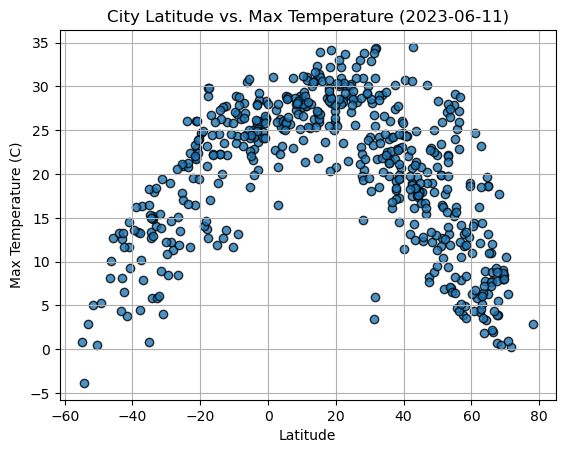

In [8]:
# Scatter plot for latitude vs. temperature incorporating graph properties
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", alpha=0.8, edgecolors="black")
plt.title("City Latitude vs. Max Temperature (2023-06-11)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Export the figure
plt.savefig("Output_Data/Fig1.png")

# Display the scatter plot
plt.show()

#### Latitude vs. Humidity

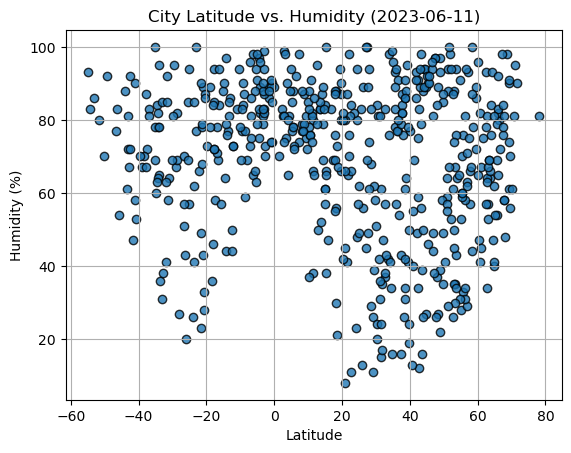

In [9]:
# Scatter plot for latitude vs. humidity incorporating graph properties
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", alpha=0.8, edgecolors="black")
plt.title("City Latitude vs. Humidity (2023-06-11)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Export the figure
plt.savefig("Output_Data/Fig2.png")

# Display the scatter plot
plt.show()

#### Latitude vs. Cloudiness

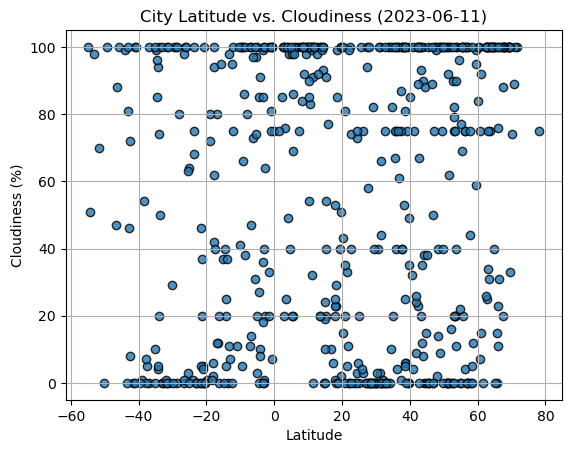

In [10]:
# Scatter plot for latitude vs. cloudiness incorporating graph properties
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", alpha=0.8, edgecolors="black")
plt.title("City Latitude vs. Cloudiness (2023-06-11)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Export the figure
plt.savefig("Output_Data/Fig3.png")

# Display the scatter plot
plt.show()

#### Latitude vs. Wind Speed

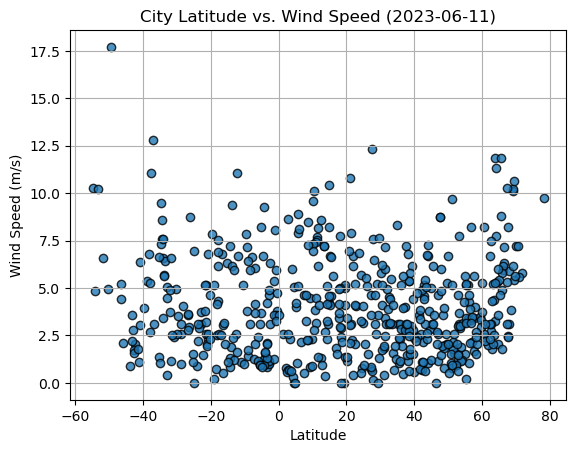

In [11]:
# Scatter plot for latitude vs. wind speed incorporating graph properties
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", alpha=0.8, edgecolors="black")
plt.title("City Latitude vs. Wind Speed (2023-06-11)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Export the figure
plt.savefig("Output_Data/Fig4.png")

# Display the scatter plot
plt.show()

---

## Requirement 2: Compute linear regression for each relationship

In [12]:
# Function to plot linear regression and call on it later
def linear_regress_plot(x_values, y_values, y_label, coords):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    plt.scatter(x_values, y_values, edgecolors="black")
    plt.plot(x_values, regress_values, "r")
    plt.annotate(line_eq, coords, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

    print(f"The r-value is: {rvalue}")

In [13]:
# Northern hemisphere DataFrame (Latitude >= 0)
northern_hemi = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,tura,25.5198,90.2201,25.63,83,100,2.03,IN,1686531764
2,whitehorse,60.7161,-135.0538,14.45,41,75,8.23,CA,1686531581
3,bethel,41.3712,-73.4140,22.05,69,75,3.60,US,1686531764
4,bisbee,31.4482,-109.9284,25.51,15,0,7.15,US,1686531701
5,keflavik,64.0049,-22.5624,8.95,76,100,7.72,IS,1686531725


In [14]:
# Southern hemisphere DataFrame (Latitude < 0)
southern_hemi = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,16.37,83,100,12.80,SH,1686531764
6,dunedin,-45.8742,170.5036,12.67,54,100,2.12,NZ,1686531260
7,el alto,-4.2714,-81.2147,22.81,82,10,9.29,PE,1686531765
13,chanika,-5.4167,38.0167,18.47,94,97,1.04,TZ,1686531766
14,grytviken,-54.2811,-36.5092,-3.86,83,51,4.87,GS,1686531766



### Temperature vs. Latitude Linear Regression Plot

#### Northern Hemisphere

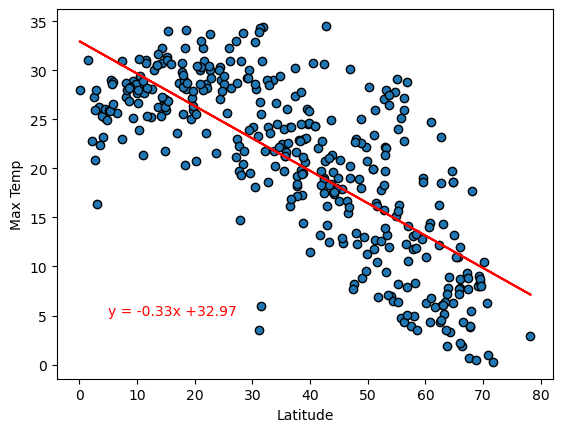

The r-value is: -0.7498452527992705


In [15]:
x_values = northern_hemi["Lat"]
y_values = northern_hemi["Max Temp"]
linear_regress_plot(x_values, y_values, "Max Temp", (5,5))

#### Southern Hemisphere

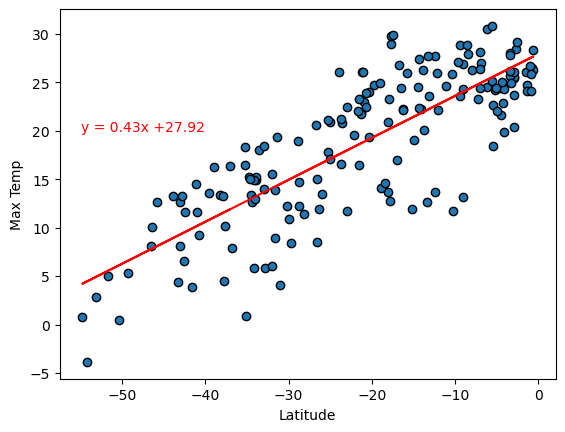

The r-value is: 0.8119879205994578


In [16]:
x_values = southern_hemi["Lat"]
y_values = southern_hemi["Max Temp"]
linear_regress_plot(x_values, y_values, "Max Temp", (-55,20))

#### Analysis
-

---

### Humidity vs. Latitude Linear Regression Plot


#### Northern Hemisphere

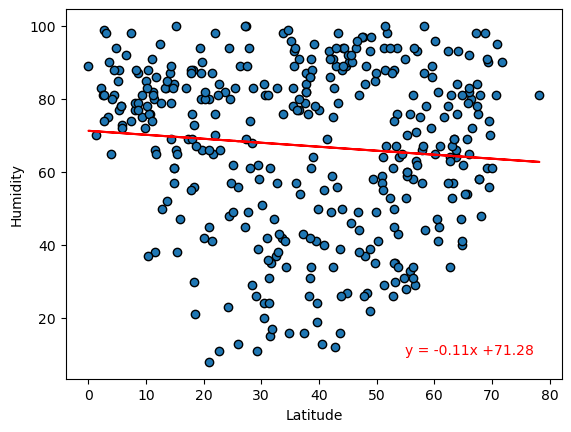

The r-value is: -0.09349910734998441


In [17]:
x_values = northern_hemi["Lat"]
y_values = northern_hemi["Humidity"]
linear_regress_plot(x_values, y_values, "Humidity", (55,10))

#### Southern Hemisphere

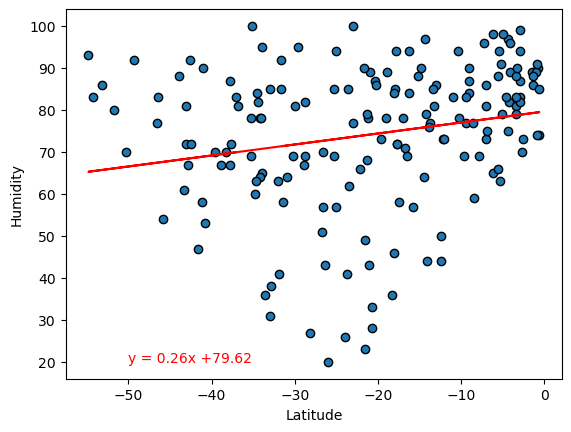

The r-value is: 0.2130163652800241


In [18]:
x_values = southern_hemi["Lat"]
y_values = southern_hemi["Humidity"]
linear_regress_plot(x_values, y_values, "Humidity", (-50,20))

#### Analysis
-

---

### Cloudiness vs. Latitude Linear Regression Plot

#### Northern Hemisphere

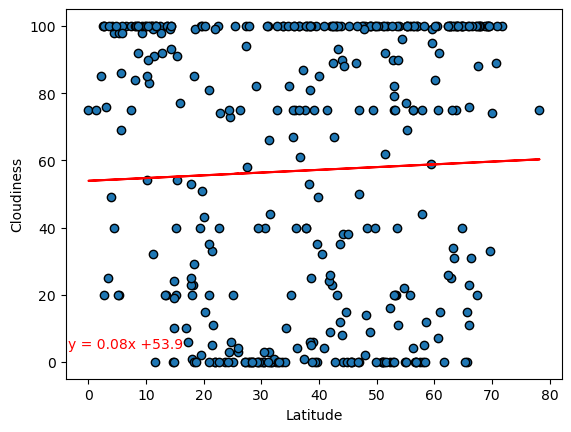

The r-value is: 0.03846179226676899


In [23]:
x_values = northern_hemi["Lat"]
y_values = northern_hemi["Cloudiness"]
linear_regress_plot(x_values, y_values, "Cloudiness", (-3.5,4))

#### Southern Hemisphere

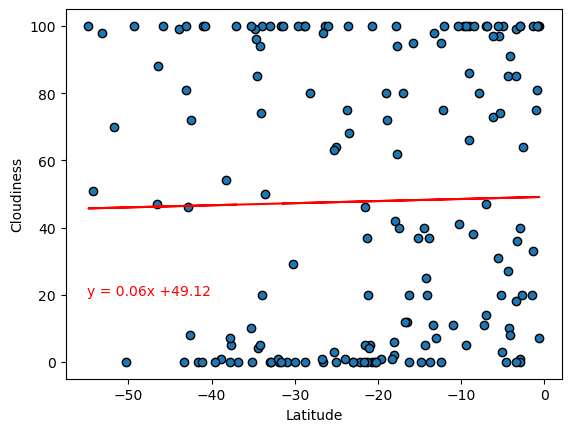

The r-value is: 0.021472453300966202


In [24]:
x_values = southern_hemi["Lat"]
y_values = southern_hemi["Cloudiness"]
linear_regress_plot(x_values, y_values, "Cloudiness", (-55,20))

#### Analysis
-

---

### Wind Speed vs. Latitude Linear Regression Plot

#### Northern Hemisphere

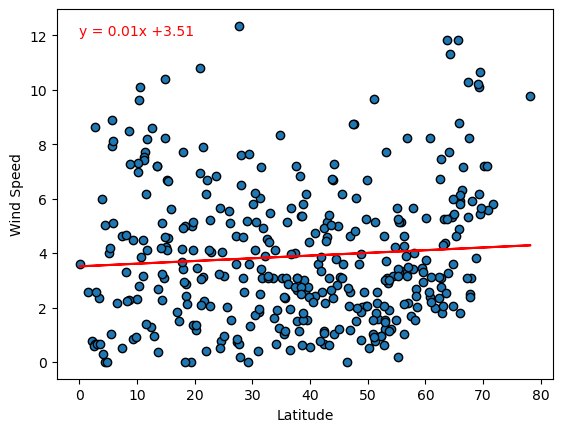

The r-value is: 0.07646705122644293


In [26]:
x_values = northern_hemi["Lat"]
y_values = northern_hemi["Wind Speed"]
linear_regress_plot(x_values, y_values, "Wind Speed", (0,12))

#### Southern Hemisphere

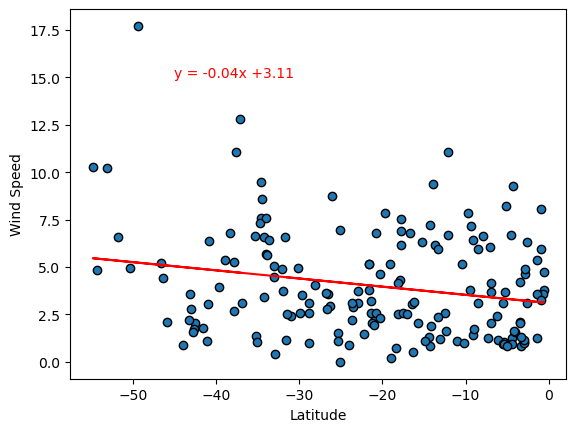

The r-value is: -0.21875567397292947


In [27]:
x_values = southern_hemi["Lat"]
y_values = southern_hemi["Wind Speed"]
linear_regress_plot(x_values, y_values, "Wind Speed", (-45,15))

#### Analysis
-

---